# CHAPTER 3 - SOLVING ORDINARY DIFFERENTIAL EQUATIONS


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-Differential-Equations" data-toc-modified-id="Linear-Differential-Equations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Differential Equations</a></span></li><li><span><a href="#Higher-Order-Differential-Equations" data-toc-modified-id="Higher-Order-Differential-Equations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Higher Order Differential Equations</a></span><ul class="toc-item"><li><span><a href="#State-Space-Representation" data-toc-modified-id="State-Space-Representation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>State Space Representation</a></span></li><li><span><a href="#Solving-the-system-of-1st-order-ODEs" data-toc-modified-id="Solving-the-system-of-1st-order-ODEs-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Solving the system of 1st order ODEs</a></span></li></ul></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise</a></span></li></ul></div>

## 1 Definition of differential equations
The equations contain the derivative （/dɪˈrɪvətɪv/）of y with respect to the independent variable x.

$$\frac{dy}{dx}=2x$$

$$\frac{dy}{dx}-\frac{2y}{x+1}=(x+1）^{\frac{5}{2}}$$

$$\frac{dy}{dx}+\frac{y}{x}={\frac{cosx}{x}}$$

$$\frac{dy}{dx}=(x+y）^2$$

General form of differential equation

$$F(x,y,y^{(1)},.....y^{(n)})=0$$

## 1.1 ODE and PDE
Differential equations can be clssified by: 
ordinary differential equation-ODE and partial differential equation-PDE.

**ordinary differential equation-ODE:**


$$\frac{dy}{dx}=2x$$

For a differential equation, there is only one independent variable, called ODE

**partial differential equation-PDE:**


$$\frac{\partial^2 u}{\partial^2 x}+\frac{\partial^2 u}{\partial^2 y}=0$$

$$\frac{\partial u}{\partial x}+\frac{\partial u}{\partial y}=0$$

For a differential equation, there are two or more independent variables, called PDE


## 1.2 First order and high order

Differential equations can be clssified by: 
first order differential equation and high-order differential equation.

**First order differential equation：**

The derivative of y with respect to the independent variable is first order


$$\frac{dy}{dx}=2x$$


**high-order differential equation:**

The derivative of y with respect to the independent variable is higher than first order. 
 
$$\frac{\partial^2 u}{\partial^2 x}+\frac{\partial^2 u}{\partial^2 y}=0$$


## 1.3 Linear and nonlinear 

Differential equations can be clssified by: 
linear and nonlinear differential equation.


**Linear differential equation:**
- The coefficient before y and y’ cannot contain y

- The equation can have y and y’, but not the fuction of y, such as $sin(y)$, $y^2$. 

$$x\frac{dy}{dx}=2$$

$$\frac{dy}{dx}=sin(x)y$$

$$\frac{dy}{dx}=y$$

**Nonlinear differential equation:**

$$y\frac{dy}{dx}=2$$

$$\frac{dy}{dx}=sin(y)y$$

$$\frac{dy}{dx}=y^2$$

## 2 Linear Differential Equations

In python we can use the [`odeint`](https://docs.scipy.org/doc/scipy-1.7.1/reference/generated/scipy.integrate.odeint.html) function to solve a first order differential equation numerically. The inputs are the function describing the differential equation, the starting/final time and the initial value. The output is the solution of the differential equation. For example, let’s solve this differential equation using analytical and numerical methods.

$$ y + \dot{y} = 1  $$

where $\dot{y}=\frac{dy}{dt}$ 

1. First re-arrange the equation in terms of $\dot{y}$:

$$ \dot{y} = 1 - y$$

2. over the time period t = 0 to 10s.
3. and has initial conditions $ y_{0} = 0 $ 

To use python to solve this ODE:

Start by importing numpy, pyplot and `odeint` from scipy

Let's start by looking at the help on the function **odeint**

In [13]:
from scipy.integrate import odeint
help(odeint)

Help on function odeint in module scipy.integrate._odepack_py:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t, ...)  [or func(t, y, ...)]
    
    where y can be a vector.
    
    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
              definition function used by the `scipy.integrate.ode` class and
 

There is a lot of information in the help file. But what we are interested in is the input parameters and the output.

**odeint(func, y0, t, args=(),.......**

func : callable(y, t, ...)

 y0 : array
        Initial condition on y (can be a vector).
        
  t : array
        A sequence of time points for which to solve for y. The initial
        value point should be the first element of this sequence.
        This sequence must be monotonically increasing or monotonically
        decreasing; repeated values are allowed.
               
 Returns
    y : array, shape (len(t), len(y0))
        Array containing the value of y for each desired time in t,
        with the initial value `y0` in the first row.

Having looked at the help on the odeint solver. The first thing to do is to create a function which represents the 1st order differential equation $dy = 1-y$

In [14]:
import numpy as np  # importing the numpy package into the python kernel we are using
import matplotlib.pyplot as plt  #importing pylab from matplotlib 
%matplotlib inline 
#This command will plot the figure "inline" with the text, use "qt" to plot in external window
from scipy.integrate import odeint 
def myfun(y,t):
    "Function to return dy"  # it is a good idea to add function descriptions to your own functions so you or others know what the function does
    dy = 1 - y
    return dy

t = np.linspace(0,10,100)# The next step is to define the time range, in this case t = 0 to 10s in 0.1s steps.
y = odeint(myfun,0,t) # 0 is the initial condition,y0=0 
print(y[0:y.size:10])  #or print y every 10 values
print('The first ten values of y = \n',y[0:10]) 

[[0.        ]
 [0.6358178 ]
 [0.86737135]
 [0.95169902]
 [0.98240964]
 [0.9935939 ]
 [0.99766702]
 [0.99915037]
 [0.99969058]
 [0.99988731]]
The first ten values of y = 
 [[0.        ]
 [0.09607608]
 [0.18292157]
 [0.26142329]
 [0.33238284]
 [0.39652489]
 [0.45450442]
 [0.50691351]
 [0.55428733]
 [0.59710964]]


Although our function is $dy = 1 - y$, the `odeint` functions returns values of $y$.

Plot the result of the odeint function (y) against time (t). 

The analystical solution is $$y = 1 - e^{-t}$$

Also plot the analytic solution against time. You can calculate $dy$ using the equation and plot this as well. Make sure you use a different line type to distinguish between the plots.

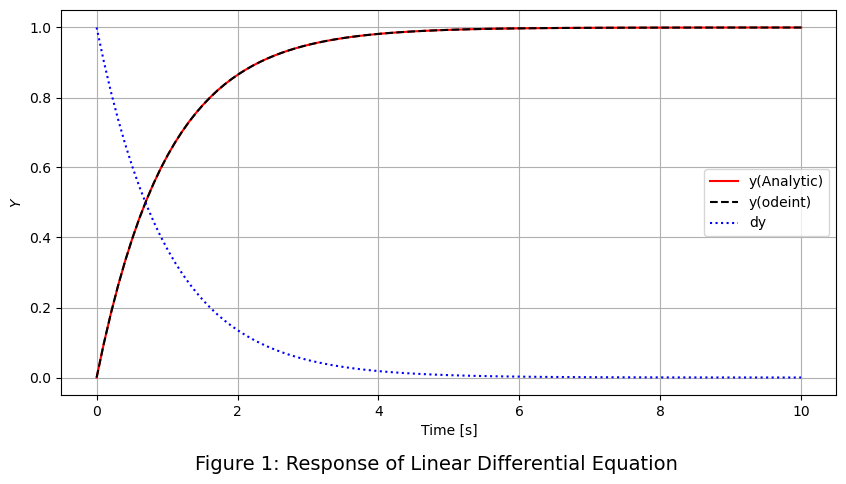

In [15]:
ya = 1 - np.exp(-t) # analytic solution 
dy = 1-y;
plt.figure(figsize=(10,5))  
plt.plot(t,y,'r-')
plt.plot(t,ya,'k--')
plt.plot(t,dy,'b:')

plt.xlabel('Time [s]')
plt.ylabel('$Y$')
plt.legend(['y(Analytic)','y(odeint)','dy'])
plt.grid('on')
cap1='Figure 1: Response of Linear Differential Equation'
plt.figtext(0.5, -0.04, cap1, wrap=True, horizontalalignment='center', fontsize=14) #
plt.show()

## 3 Higher Order Differential Equations

Consider the following mass-spring-damper system:

<img src="https://media.cheggcdn.com/media%2F782%2F782f05ca-31aa-4f90-9e04-d6f895aa4f10%2FphpImPTN8.png" />


**<center> Figure 2: Diagram of Simple Mass-Spring-Damper System </center>**

    


Newton's 2nd law gives us:

$$m \ddot{x} + b \dot{x} + k x = f(t)$$

This 2nd order differential equation, can be written as a set of 1st order differential equations. Having a set of 1st order differential equations allows the equations to be written in matrix form (state space) which is convenient for simulation using numerical methods such as `odeint`.

### State Space Representation

Start with the 2nd order ODE: $$m \ddot{x} + b \dot{x} + k x = f(t)$$

Then rename the dependent variable $x$ and its 1st derivative as follows:

$$x_1 (t) = x(t) $$

$$x_2 (t) = \dot{x} (t) = \dot{x_1} (t) $$

where $x_{1}$ is the position (displacement) of the mass in metres
and $x_{2}$ is the derivative of $x_{1}$ or the velocity of the mass in metres per second.

From this change of variables we get the first 1st order ODE:
$$ \dot{x_1} (t) = x_2 (t) $$

If we then substitute this equation into the 2nd order ODE equation:

$$ m \dot{x_2} + b x_2 + k x_1 = f $$

If we rearange for $\dot{x_2}$ and divide through by $m$ this leads to our second 1st order ODE:

$$ \dot{x_2} = -\frac{b}{m} x_2 - \frac{k}{m} x_1 + \frac{f}{m}  $$

These two 1st order ODEs can be written in matrix form **$ \dot{y} = A y + B f $**

$$ \begin{bmatrix} \dot{x_1} \\ \dot{x_2} \end{bmatrix} =  \begin{bmatrix} 0 & 1 \\ -k/m & -b/m  \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + \begin{bmatrix} 0 \\ f/m \end{bmatrix}$$

If we multiply out this matrix we should get a trivial equation: 

$$ \dot{x_1}  = 0 x_1 + 1 x_2 + 0 f$$

and the equation we are interested in:

$$ \dot{x_2} = -\frac{k}{m} x_1 - \frac{b}{m} x_2 + \frac{f}{m} $$

**This is equivalent to create two 1st order ODEs**

### Solving the system of 1st order ODEs

To solve the matrix differential equation numerically use the `odeint` function. First you need to write a function to describe the differential equation and then obtain a numerical solution. 

Note: The commenting style used in this function reflects the standard you should aspire to in your own code. As you become more familiar with programming, we would expect you to state what the input types would be.

To simplify the problem let us ignore the forcing function $f$ and consider the free vibration of a mass spring damper system:

$$m \ddot{x} + b \dot{x} + k x = f(t)$$

The second order ODE above can be written in state space form:

$$ \begin{bmatrix} \dot{x_1} \\ \dot{x_2} \end{bmatrix} =  \begin{bmatrix} 0 & 1 \\ -k/m & -b/m  \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} $$

In [16]:
from scipy.integrate import odeint
def spring_mass_damper(x, t, k=15.2e3, b=1000, m=1237):
    """Calculating the differential of a spring-mass-damper system.
    Function to calculate the differential of a spring-mass system.
    Arguments:
        x: Distance (m)  x=[x1,x2] x1=x x2=dx=dx1
        t: Time (s)
        k: Spring constant (N/m)
        b: Damping Coefficient (Ns/m)
        m: Mass (kg)
    Returns:
        dy: Differential
    """
    A = np.array([[0,1],[-k/m, -b/m]])
    dx = np.dot(A,x)
    return dx
# help(spring_mass_damper) # To display the help for your function

# comparion with 1st order solution function
# def myfun(y,t):
#    "Function to return dy"  # it is a good idea to add function descriptions to your own functions so you or others know what the function does
#    dy = 1 - y
#    return dy

Next create a time array **t** using the `np.linspace` function betweem 0 and 10 seconds with 100 intervals. Then use the `odeint` function calling your function **spring_mass** with initial conditions of displacement, $x=0m$ and velocity, $\dot{x}=10m/s$ over the time range t.

In [17]:
t = np.linspace(0,10,100)    
dx = odeint(spring_mass_damper,[0,10], t) #(function_name, [array, initial value, x1=x=0, x2=dx=dx1=10], time)
# 1st:y = odeint(myfun,0,t) 
# 0 is the initial condition,y0=0 
#return array(x1,x2)
# print(dx[0:5,:] )
print(dx)
#print(dx[0:dx.size:10])  #or print y every 10 values
# Return the first 10 rows of both columns of dx. dx contains displacement x and velocity xdot, 
# you should be able to check the value match the initial conditions.

[[ 0.00000000e+00  1.00000000e+01]
 [ 9.49821045e-01  8.62832663e+00]
 [ 1.71200456e+00  6.33624654e+00]
 [ 2.21045847e+00  3.46900495e+00]
 [ 2.40647755e+00  4.13299410e-01]
 [ 2.30042304e+00 -2.45204102e+00]
 [ 1.92861636e+00 -4.80057193e+00]
 [ 1.35619209e+00 -6.39301794e+00]
 [ 6.67078700e-01 -7.09894428e+00]
 [-4.74742678e-02 -6.90376223e+00]
 [-7.00341509e-01 -5.90138336e+00]
 [-1.21857855e+00 -4.27452340e+00]
 [-1.55100025e+00 -2.26597043e+00]
 [-1.67257270e+00 -1.44949154e-01]
 [-1.58534516e+00  1.82702697e+00]
 [-1.31608224e+00  3.42670733e+00]
 [-9.11137252e-01  4.49270155e+00]
 [-4.29393717e-01  4.93985660e+00]
 [ 6.57323766e-02  4.76342387e+00]
 [ 5.14203278e-01  4.03332016e+00]
 [ 8.66247340e-01  2.87994324e+00]
 [ 1.08748373e+00  1.47389405e+00]
 [ 1.16181166e+00  2.49939375e-03]
 [ 1.09189528e+00 -1.35381762e+00]
 [ 8.97374809e-01 -2.44249140e+00]
 [ 6.11195565e-01 -3.15480587e+00]
 [ 2.74639582e-01 -3.43540842e+00]
 [-6.82463278e-02 -3.28472010e+00]
 [-3.76115034e-01 -2

The result is a two dimensional array, where the first column is the displacement $x_1$, the second column is the velocity $x_2$.

Now that we have determined $x$ and $\dot{x}$ we can calculate $\ddot{x}$ from our original equation of motion $m\ddot{x} + b \dot{x} + kx =0$. Rearranging for $\ddot{x}$ gives:

$$\ddot{x}=-k\frac{x}{m} - b\frac{\dot{x}}{m}$$

In [18]:
k=15.2e3
m=1237
b=1000
xd=dx[:,1]
x=dx[:,0]
xdd=-k*x/m - b*xd/m

And finally plot your solution.

You can see the initial conditions, the displacement x starts at 0 and the velocity $\dot{x}$ starts from 10.

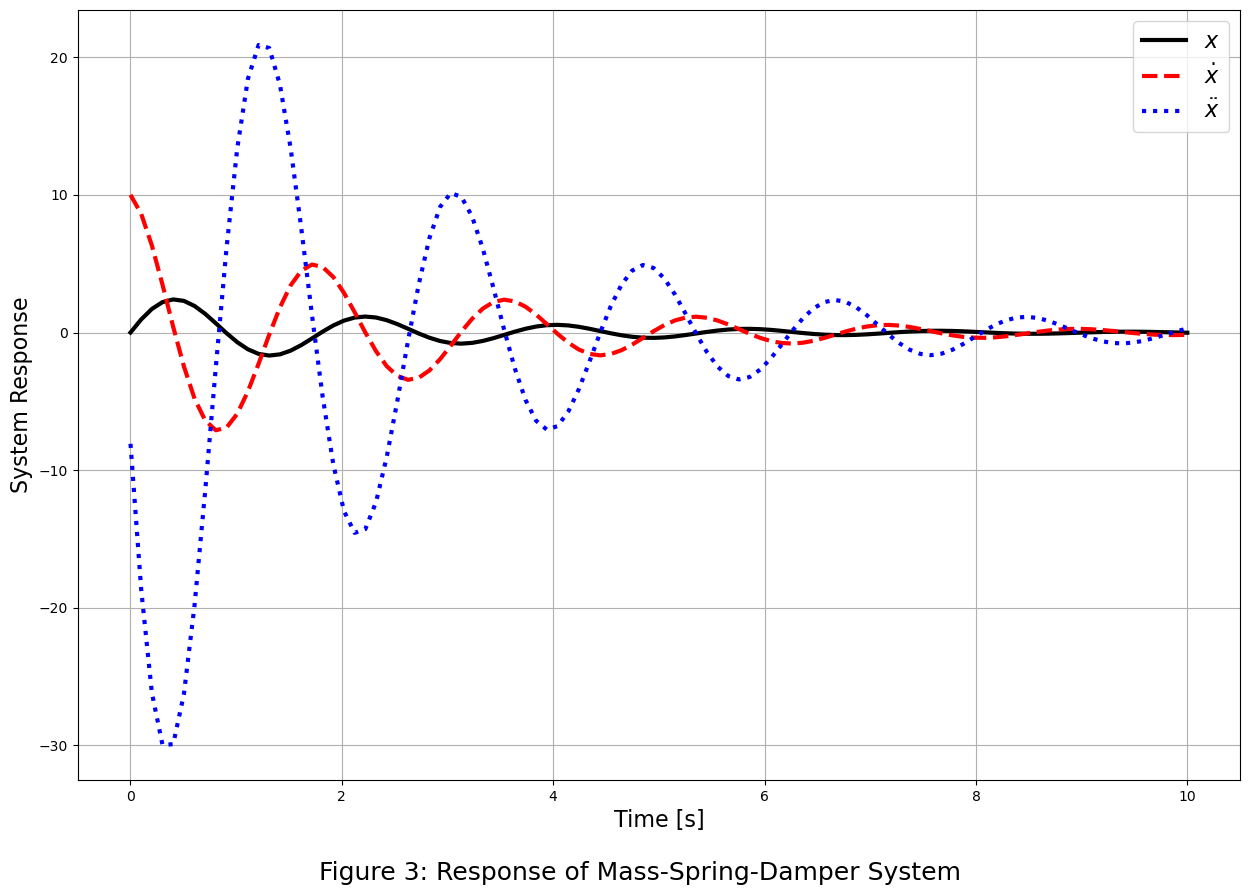

In [19]:
plt.figure(figsize=(15,10))
plt.plot(t,x,'k-',linewidth=3)
plt.plot(t,xd,'r--',linewidth=3)
plt.plot(t,xdd,'b:',linewidth=3)
plt.xlabel('Time [s]',fontsize=16)
plt.ylabel('System Response',fontsize=16)
plt.legend(['$x$','$\dot{x}$','$\ddot{x}$'],fontsize=16)
plt.grid('on')

cap3='Figure 3: Response of Mass-Spring-Damper System'
plt.figtext(0.5, 0.01, cap3, wrap=True, horizontalalignment='center', fontsize=18)
plt.show()

The natural frequency of the system $\omega_n = \sqrt{k/m}$

and the damping ratio is $\zeta = \frac{b}{2\sqrt{m^2 k/m}}$

and finally the damped natural frequency is $\omega_d = \omega_n \sqrt{1-\zeta^2}$

So we can calculate these values:

In [20]:
wn = np.sqrt(k/m)

z = b/(2*np.sqrt(m**2 * k/m))

wd = wn*np.sqrt(1-z**2)

print('wn = ',np.round(wn,3),'\n')

print('z = ',np.round(z,3),'\n')

print('wd = ',np.round(wd,3),'\n')



wn =  3.505 

z =  0.115 

wd =  3.482 


## 4 Exercise

A useful function for determining the peaks (or troughs) in a signal is the scipy.signal `find_peaks` function. There are lots of parameters which can be configured for this function, so it is well worth looking at the help.

Here is an example of how it can be used to analyse the peaks and troughs for the acceleration signal from the mass-spring-damper system.

index_peaks=  [12 30 48 66 84] 

index_troughs=  [ 3 21 39 57 75 93] 


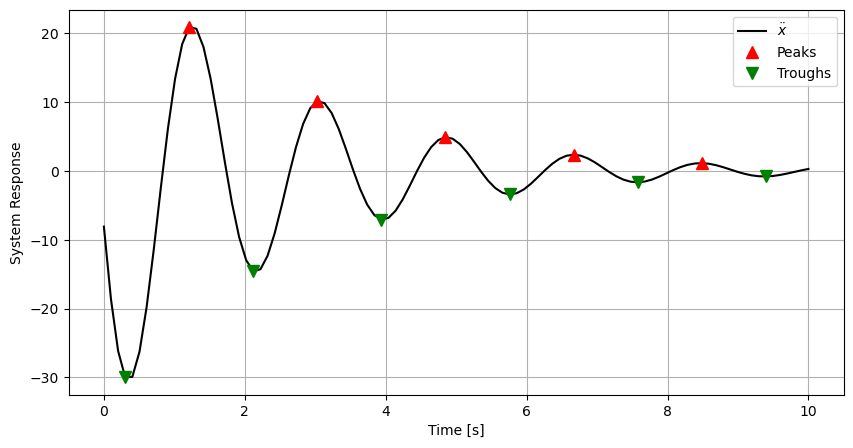

In [21]:
from scipy.signal import find_peaks
index_peaks = find_peaks(xdd)[0]     # index of positive value
index_troughs = find_peaks(-xdd)[0]  # index of negative value

print('index_peaks= ',index_peaks,'\n')
print('index_troughs= ',index_troughs,'\n')

plt.figure(figsize=(10,5))
plt.plot(t,xdd,'k-')
plt.plot(t[index_peaks],xdd[index_peaks],'r^',markersize=8)
plt.plot(t[index_troughs],xdd[index_troughs],'gv',markersize=8)
plt.xlabel('Time [s]')
plt.ylabel('System Response')
plt.legend(['$\ddot{x}$','Peaks','Troughs'])
plt.grid('on')
plt.show()

### Question 1

 Model the mass spring system with the following properties:
   - mass m = 200
   - spring stiffness k = 500
   
   1. Determine the equation of motion.
   2. rewrite this in state space form using $x_1$ and $x_2$ .
   3. Write a function for this equation of motion
   4. Solve the equation of motion over the time interval t=0 to 20 seconds, with initial conditions $x_1= -0.01 m$ and  $x_2=  0 m/s$ .
   5. Plot the displacement, velocity and acceleration against time.



Determine th amplitude of the acceleration in $m/s^2$

### QUESTION 2

Model the same mass spring system with the addition of a damper with the following properties:

- mass m = 200
- spring stiffness k = 500
- damping coefficient c = 50

1. Determine the equation of motion.
1. rewrite this in state space form using $x_1$ and $x_2$ .
1. Write a function for this equation of motion
1. Solve the equation of motion over the time interval t=0 to 20 seconds,, with initial conditions  $x_1= 0 m$ and  $x_2=  -0.5 m/s$ .
1. Plot the displacement, velocity and acceleration against time.


What is the ratio of the 3rd peak to the 1st peak in the velocity response (Peak 3/ Peak 1) rounded to 3 decimal places?

### QUESTION 3

Model the forced mass spring damper system the following properties:

- mass m = 200
- spring stiffness k = 500
- damping coefficient c = 50
- Force = A*cos(2π f t), where  A=1 N and frequency f = 0.24 Hz

1. Determine the equation of motion.
1. rewrite this in state space form using $x_1$ and $x_2$ .
1.Write a function for this equation of motion
1.Solve the equation of motion over the time interval t=0 to 60 seconds,, with initial conditions  $x_1= 0 m$ and  $x_2=  0 m/s$ .
1.Plot the displacement, velocity and acceleration against time.

What is the amplitude of the displacement once it has stabillized, give your answer rounded to 3 decimal places?